In [45]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("../data/raw_data_finance.csv", sep=";", parse_dates=['date'], index_col=['date'])
df.drop(columns="Unnamed: 0", inplace=True)

/var/folders/4q/3_bfyqnn7yv5jcjq98x2jf680000gn/T/ipykernel_50710/923549059.py:1: DtypeWarning: Columns (6,8,16,17,26,33,34,66,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,252,253,255,257,259,261,263,265,267,269,270,271,272,273,274,275,276,277,278,279,280,284,285,286,290) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw_data_finance.csv", sep=";", parse_dates=['date'], index_col=['date'])


In [37]:
df.head()

symbol  year  quarter  week acceptedDate  calendarYear  cik  \
date                                                                        
1995-01-31  ALMIL.PA  1995        1     5          NaN           NaN  NaN   
1995-03-31  ALMIL.PA  1995        3    13          NaN           NaN  NaN   
1995-06-30  ALMIL.PA  1995        6    26          NaN           NaN  NaN   
1995-09-30  ALMIL.PA  1995        9    39          NaN           NaN  NaN   
1996-01-31  ALMIL.PA  1996        1     5          NaN           NaN  NaN   

            costAndExpenses  costOfRevenue  depreciationAndAmortization  ...  \
date                                                                     ...   
1995-01-31              NaN            NaN                          NaN  ...   
1995-03-31              NaN            NaN                          NaN  ...   
1995-06-30              NaN            NaN                          NaN  ...   
1995-09-30              NaN            NaN                          NaN  ...   
1996-01-31              NaN            NaN                          NaN  ...   

            estimatedRevenueAvg  estimatedRevenueHigh  estimatedRevenueLow  \
date                                                                         
1995-01-31                  NaN                   NaN                  NaN   
1995-03-31                  NaN                   NaN                  NaN   
1995-06-30                  NaN                   NaN                  NaN   
1995-09-30                  NaN                   NaN                  NaN   
1996-01-31                  NaN                   NaN                  NaN   

            estimatedSgaExpenseAvg estimatedSgaExpenseHigh  \
date                                                         
1995-01-31                     NaN                     NaN   
1995-03-31                     NaN                     NaN   
1995-06-30                     NaN                     NaN   
1995-09-30                     NaN                     NaN   
1996-01-31                     NaN                     NaN   

           estimatedSgaExpenseLow  numberAnalystEstimatedRevenue  \
date                                                               
1995-01-31                    NaN                            NaN   
1995-03-31                    NaN                            NaN   
1995-06-30                    NaN                            NaN   
1995-09-30                    NaN                            NaN   
1996-01-31                    NaN                            NaN   

            numberAnalystsEstimatedEps  close  volume  
date                                                   
1995-01-31                         NaN    NaN     NaN  
1995-03-31                         NaN    NaN     NaN  
1995-06-30                         NaN    NaN     NaN  
1995-09-30                         NaN    NaN     NaN  
1996-01-31                         NaN    NaN     NaN  

[5 rows x 289 columns]

In [38]:
print(f"Number of records: {len(df)}")

Number of records: 210224


In [39]:
print(f"Number of stocks: {df.symbol.nunique()}")

Number of stocks: 1407


In [40]:
print(f"Number of fundamentals: {len(df.columns) - 9}")

Number of fundamentals: 280


### Missing fields visualization

<Axes: >

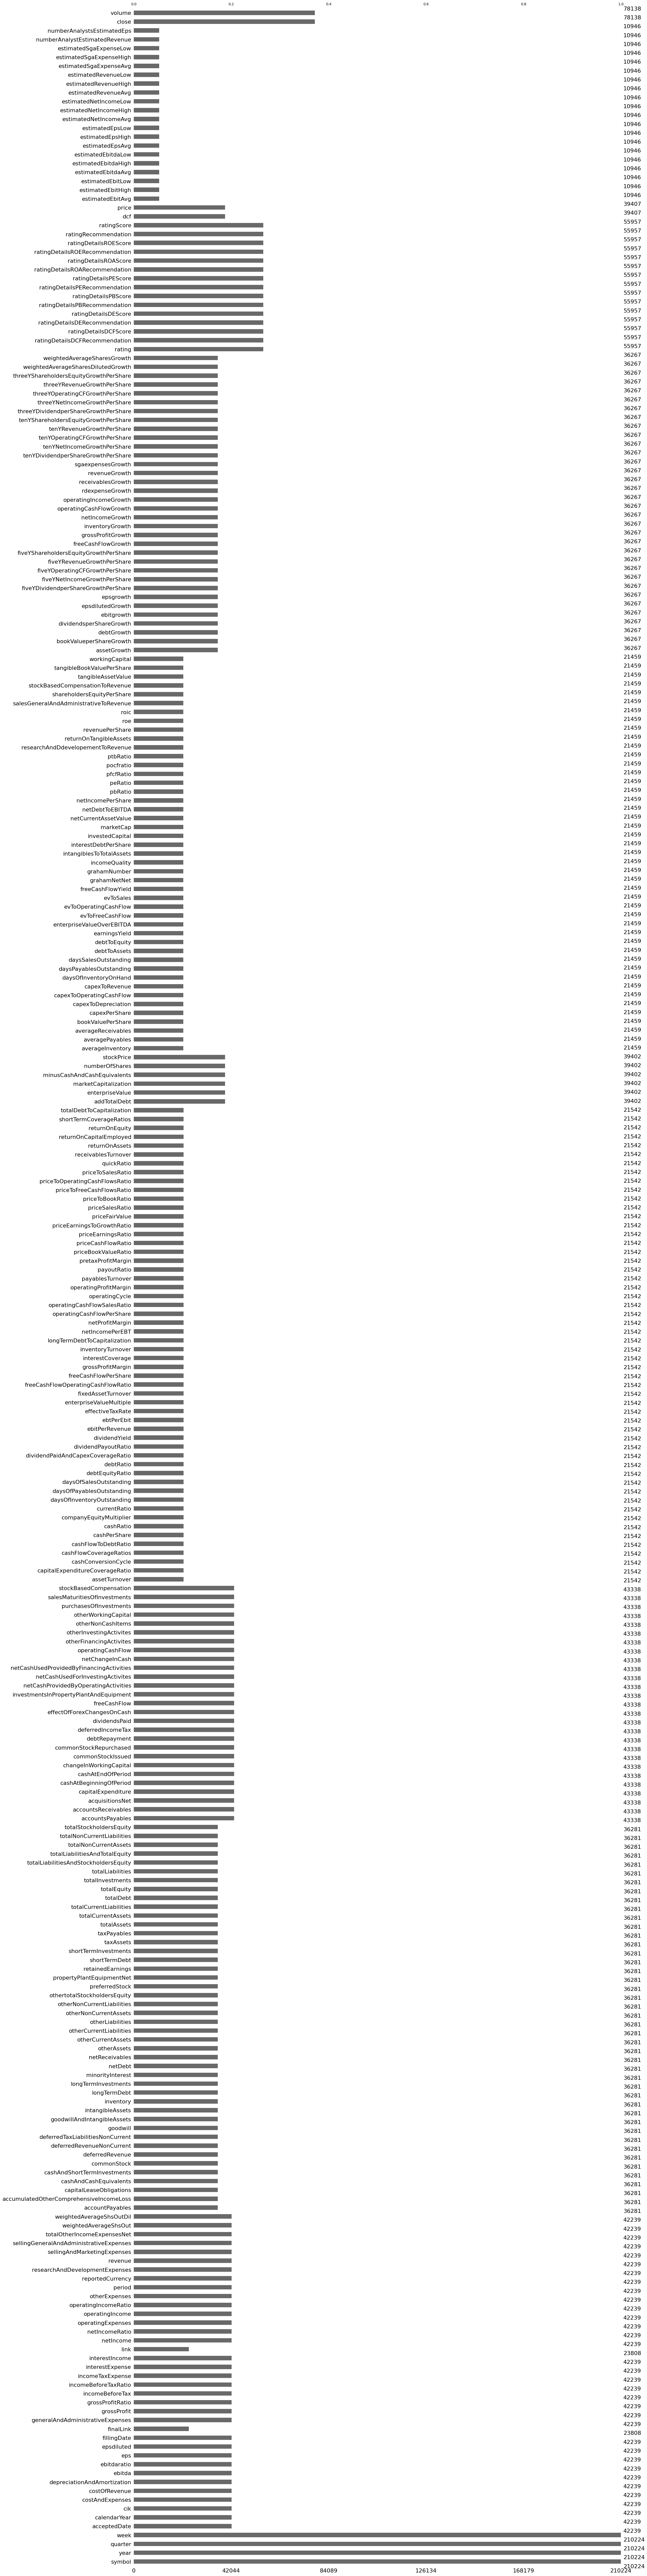

In [41]:
msno.bar(df)

How to fill missing values?

### Duplicates analysis

In [42]:
num_duplicates = len(df) - len(df.drop_duplicates())

print(f"Number of duplicate rows: {num_duplicates}")
print(f"Percentage of duplicate rows: {num_duplicates / len(df): .2f}")

Number of duplicate rows: 52208
Percentage of duplicate rows:  0.25


<Axes: >

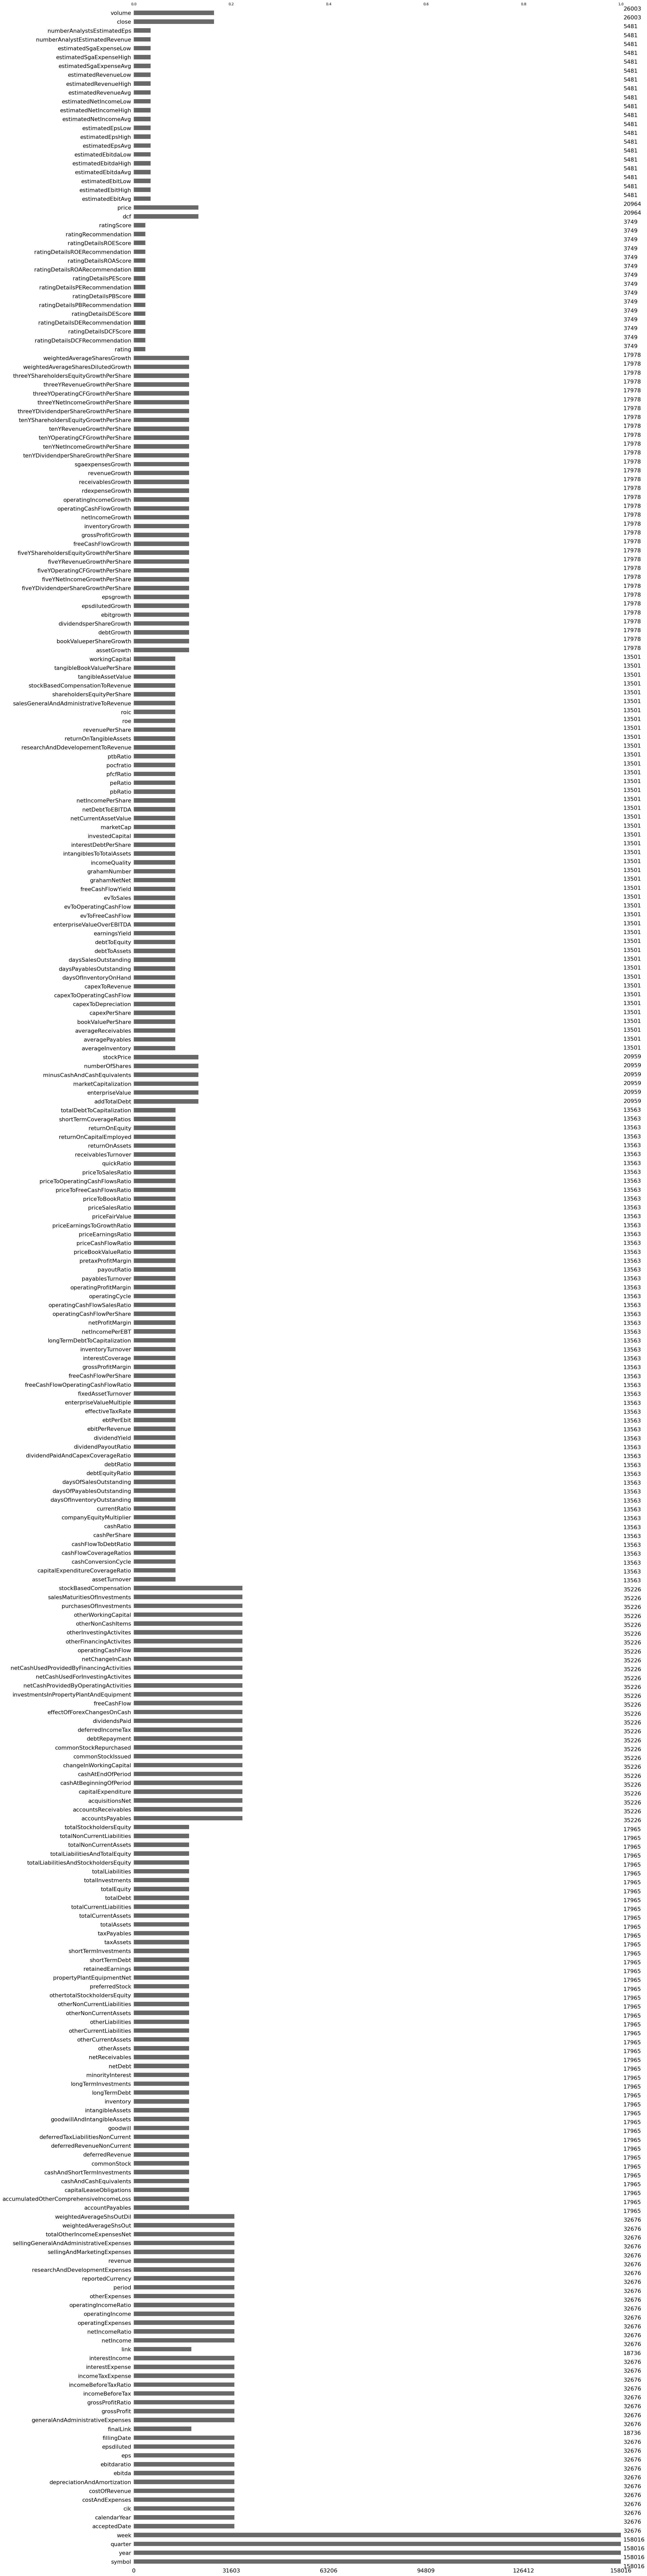

In [43]:
msno.bar(df.drop_duplicates())

marketCapitalization, marketCap

In [47]:
df[['marketCap', 'marketCapitalization']]

marketCap  marketCapitalization
date                                      
1995-01-31       NaN                   NaN
1995-03-31       NaN                   NaN
1995-06-30       NaN                   NaN
1995-09-30       NaN                   NaN
1996-01-31       NaN                   NaN
...              ...                   ...
2022-01-31       NaN                   NaN
2022-01-31       NaN                   NaN
2022-03-31       NaN                   NaN
2022-06-30       NaN                   NaN
2022-09-30       NaN                   NaN

[210224 rows x 2 columns]

In [52]:
df['marketCap'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 210224 entries, 1995-01-31 to 2022-09-30
Series name: marketCap
Non-Null Count  Dtype 
--------------  ----- 
21459 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [53]:
df['marketCapitalization'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 210224 entries, 1995-01-31 to 2022-09-30
Series name: marketCapitalization
Non-Null Count  Dtype  
--------------  -----  
39402 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


In [55]:
df['marketCap'].value_counts()

marketCap
missing              180
26866000000.0         84
1289673249.312        48
2339076797.976924     23
96557611.35           23
                    ... 
1051980000.0           1
1139645000.0           1
1091323527.0           1
1042241382.0           1
14975084081.94         1
Name: count, Length: 12905, dtype: int64

In [56]:
df['marketCapitalization'].value_counts()

marketCapitalization
0.000000e+00    13387
2.772425e+10       42
2.686600e+10       42
1.275191e+09       24
1.289673e+09       24
                ...  
1.412439e+08        1
2.203405e+08        1
2.554497e+08        1
2.750000e+07        1
1.497508e+10        1
Name: count, Length: 17484, dtype: int64